In [1]:
!git clone https://github.com/rishabh-bhardwaj-64rr/EVA5.git

Cloning into 'EVA5'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 373 (delta 52), reused 12 (delta 1), pack-reused 269
Receiving objects: 100% (373/373), 2.47 MiB | 5.11 MiB/s, done.
Resolving deltas: 100% (180/180), done.


In [2]:
cd EVA5/S9/

/content/EVA5/S9


In [3]:
from __future__ import print_function

import matplotlib.pyplot as plt

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

from tqdm import tqdm

import albumentations as A
import albumentations.pytorch.transforms as APT

In [4]:

from data_loading import transform, dataset, dataloader
from models import resnet
import normalisation as norm, loss_functions, trainer, tester, run_model
from utils import plot_metrics, show_image, classwise_accuracy
import run_grad_cam

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
mean = (0.49139968, 0.48215841, 0.44653091)
std = (0.24703223, 0.24348513, 0.26158784)

In [6]:
# train_transforms, test_transforms = transform.cifar10_transforms(mean, std)
train_transforms, test_transforms = transform.cifar10_albumentations(mean, std)
trainset, testset = dataset.cifar10_dataset(train_transforms, test_transforms)
train_loader, test_loader = dataloader.cifar10_dataloader(trainset, testset)
# ToTensorV2()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA available? True


In [7]:
# device
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [8]:
# classes in the data
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

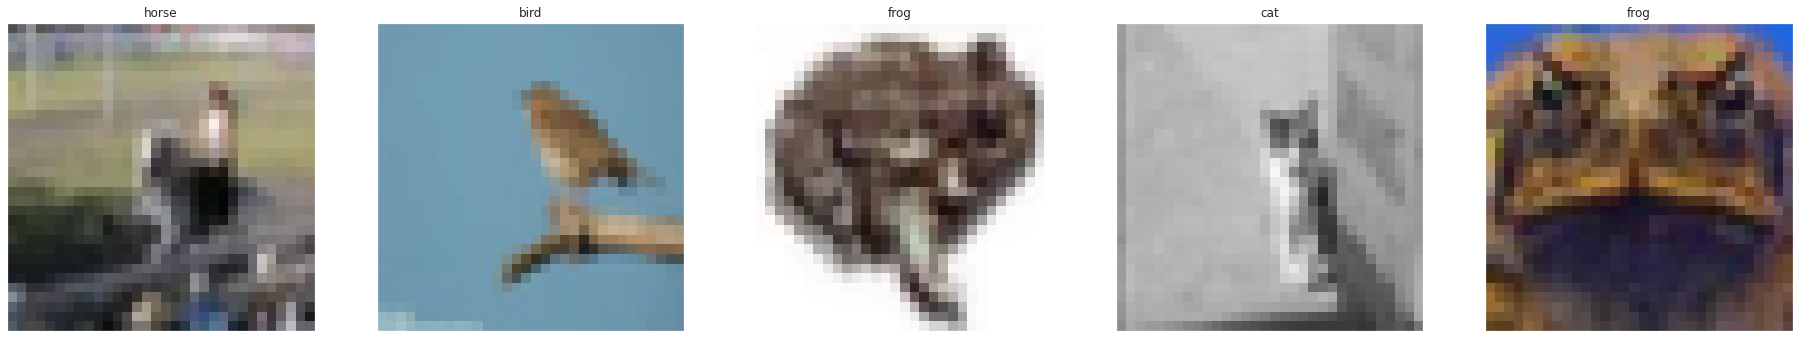

In [26]:
# plotting dataset images(32x32)
show_image.plot_dataset_images(device, classes, test_loader, mean, std, num_of_images=5)

In [12]:
# model summary
net = resnet.ResNet18().to(device)
print(summary(net, input_size=(3, 32, 32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [13]:
EPOCHS = 25
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9) # lr=0.005 previously

train_acc = []
train_losses = []
test_acc = []
test_losses = []

run_model.evaluation( net, train_loader, test_loader, optimizer, EPOCHS, device,
                    train_acc, train_losses, test_acc, test_losses)

  0%|          | 0/391 [00:00<?, ?it/s]


 Epoch: 1


Loss = 1.2631407976150513 Batch_id = 390 Accuracy = 47.21: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6199/10000 (61.99%)


 Epoch: 2


Loss = 0.811259388923645 Batch_id = 390 Accuracy = 64.40: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7144/10000 (71.44%)


 Epoch: 3


Loss = 0.8597165942192078 Batch_id = 390 Accuracy = 71.21: 100%|██████████| 391/391 [01:00<00:00,  6.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7399/10000 (73.99%)


 Epoch: 4


Loss = 0.4815056324005127 Batch_id = 390 Accuracy = 75.08: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7621/10000 (76.21%)


 Epoch: 5


Loss = 0.7934187650680542 Batch_id = 390 Accuracy = 77.88: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7818/10000 (78.18%)


 Epoch: 6


Loss = 0.3706555962562561 Batch_id = 390 Accuracy = 79.93: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7961/10000 (79.61%)


 Epoch: 7


Loss = 0.622524082660675 Batch_id = 390 Accuracy = 81.80: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8333/10000 (83.33%)


 Epoch: 8


Loss = 0.41442689299583435 Batch_id = 390 Accuracy = 82.88: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8188/10000 (81.88%)


 Epoch: 9


Loss = 0.36873555183410645 Batch_id = 390 Accuracy = 84.30: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8552/10000 (85.52%)


 Epoch: 10


Loss = 0.3604119122028351 Batch_id = 390 Accuracy = 85.05: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8604/10000 (86.04%)


 Epoch: 11


Loss = 0.6281061768531799 Batch_id = 390 Accuracy = 85.86: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8511/10000 (85.11%)


 Epoch: 12


Loss = 0.38013985753059387 Batch_id = 390 Accuracy = 86.95: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8565/10000 (85.65%)


 Epoch: 13


Loss = 0.39705583453178406 Batch_id = 390 Accuracy = 87.17: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8705/10000 (87.05%)


 Epoch: 14


Loss = 0.4336479604244232 Batch_id = 390 Accuracy = 88.29: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8732/10000 (87.32%)


 Epoch: 15


Loss = 0.3593234419822693 Batch_id = 390 Accuracy = 88.49: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8686/10000 (86.86%)


 Epoch: 16


Loss = 0.23023192584514618 Batch_id = 390 Accuracy = 89.08: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8499/10000 (84.99%)


 Epoch: 17


Loss = 0.290740966796875 Batch_id = 390 Accuracy = 89.83: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8770/10000 (87.70%)


 Epoch: 18


Loss = 0.23059459030628204 Batch_id = 390 Accuracy = 90.15: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8793/10000 (87.93%)


 Epoch: 19


Loss = 0.3032686710357666 Batch_id = 390 Accuracy = 90.40: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8774/10000 (87.74%)


 Epoch: 20


Loss = 0.11312828958034515 Batch_id = 390 Accuracy = 91.08: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8751/10000 (87.51%)


 Epoch: 21


Loss = 0.32575923204421997 Batch_id = 390 Accuracy = 91.37: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8736/10000 (87.36%)


 Epoch: 22


Loss = 0.16580702364444733 Batch_id = 390 Accuracy = 91.77: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8745/10000 (87.45%)


 Epoch: 23


Loss = 0.2683757245540619 Batch_id = 390 Accuracy = 91.94: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8820/10000 (88.20%)


 Epoch: 24


Loss = 0.18378838896751404 Batch_id = 390 Accuracy = 92.43: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8868/10000 (88.68%)


 Epoch: 25


Loss = 0.28878480195999146 Batch_id = 390 Accuracy = 92.54: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]



Test set: Average loss: 0.0036, Accuracy: 8735/10000 (87.35%)



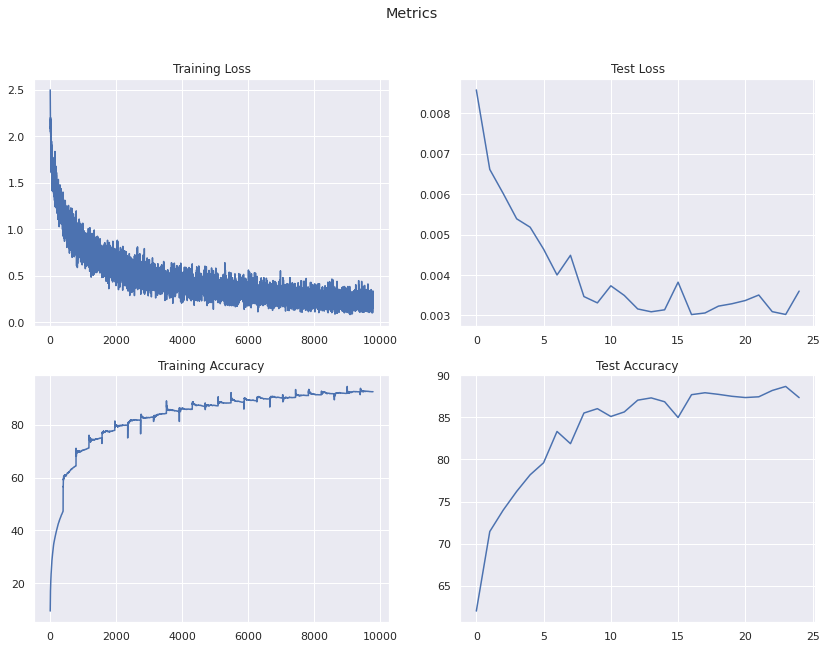

In [14]:
train_metric = (train_acc, train_losses)
test_metric = (test_acc, test_losses)

plot_metrics.metrics(train_metric, test_metric)

In [15]:
# classwise accuracy
classwise_accuracy.classwise_accuracy(net, test_loader, device, classes)

Accuracy of plane : 96 %
Accuracy of   car : 86 %
Accuracy of  bird : 83 %
Accuracy of   cat : 53 %
Accuracy of  deer : 86 %
Accuracy of   dog : 93 %
Accuracy of  frog : 95 %
Accuracy of horse : 96 %
Accuracy of  ship : 89 %
Accuracy of truck : 96 %


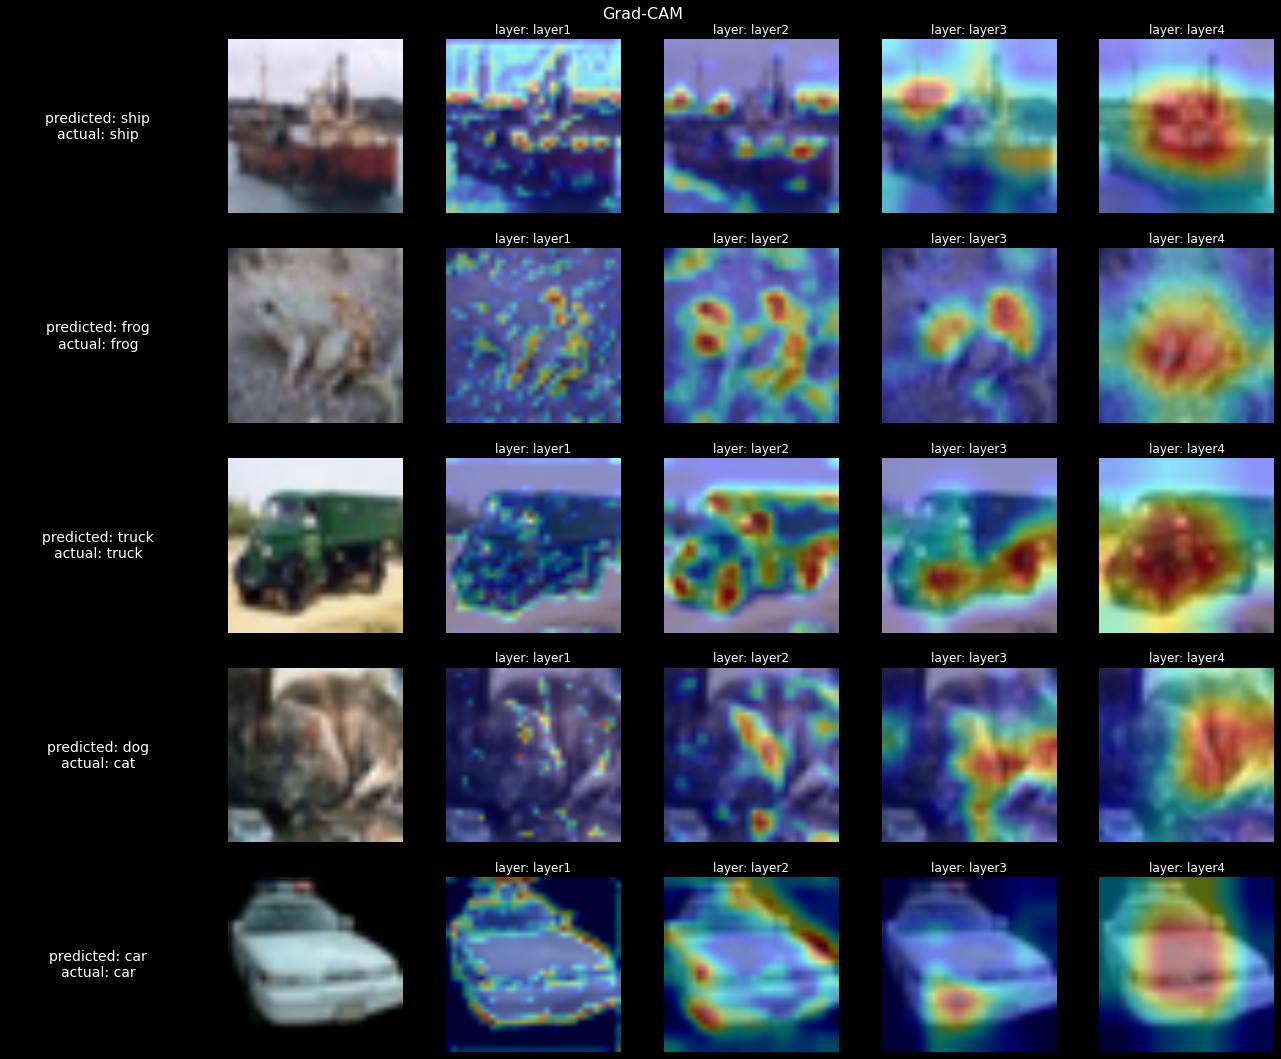

In [16]:
# grad cam
target_layers = ["layer1", "layer2", "layer3", "layer4"]
run_grad_cam.plot_gradcam(net, device, test_loader, classes, target_layers, mean, std)

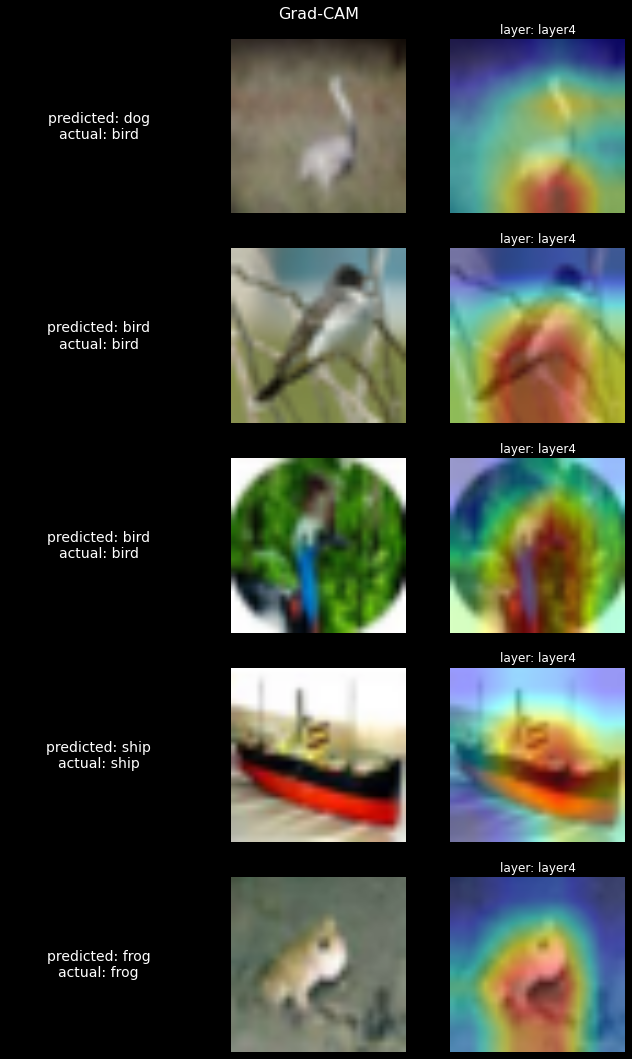

In [17]:
# grad cam
target_layers = ['layer4']
run_grad_cam.plot_gradcam(net, device, test_loader, classes, target_layers, mean, std)